In [1]:
# Importing all required packages first
import os, sys
import subprocess
import codecs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import platform


sns.set_style('darkgrid')

'C:\\Users\\shrey'

## System Information

In [15]:
print("platform.machine() = ", (platform.machine()))

print("platform.processor() = ", (platform.processor()))

print("platform.platform() = ", (platform.platform()))

print("platform.uname() = " , (platform.uname()))

platform.machine() =  x86_64 


platform.processor() =  i386 


platform.platform() =  macOS-12.6-x86_64-i386-64bit 


platform.uname() =  uname_result(system='Darwin', node='Shreyashs-MacBook-Pro.local', release='21.6.0', version='Darwin Kernel Version 21.6.0: Mon Aug 22 20:17:10 PDT 2022; root:xnu-8020.140.49~2/RELEASE_X86_64', machine='x86_64')

 


### Utils

In [18]:
def calculate_time(sort_name, type_opt, command_unoptimized):
    res = subprocess.check_output(command_unoptimized, shell=True).decode()
    return float(res.rstrip())

def get_data(sort_name):
    
    sort_values={}
    
    # Traversing to sorting algo location
    os.chdir(r"D:\speed_comp")
    os.chdir(os.getcwd()+"\\"+sort_name)
    
    ## Commands to run
    # C++ (unoptimized)
    type_opt="_unoptimized"
    command_unoptimized = "g++ "+sort_name+".cpp -o "+sort_name+type_opt+" -std=c++17 && "+ sort_name+type_opt
    # time function call
    res=calculate_time(sort_name, type_opt, command_unoptimized)
    sort_values.update({type_opt:res})
    
    #C++ (optimized)
    type_opt="_optimized"
    command_optimized = "g++ "+sort_name+".cpp -O3 -o "+sort_name+type_opt+" -std=c++17 && "+ sort_name+type_opt
    # time function call
    res=calculate_time(sort_name, type_opt, command_optimized)
    sort_values.update({type_opt:res})

    #WebAssembly (optimized)
    type_opt="_WASM"
    command_WASM = "emsdk_env.bat && emcc "+sort_name+".cpp -O3 -o "+sort_name+type_opt+".html -std=c++17 --emrun && emrun "+sort_name+type_opt+".html"
    res=calculate_time(sort_name, type_opt, command_WASM)
    sort_values.update({type_opt:res})
    
    #JavaScript
    type_opt="_javascript"
    command_JS = "node "+sort_name+".js"
    res=calculate_time(sort_name, type_opt, command_JS)
    sort_values.update({type_opt:res})
    return(sort_values)


def plot_graph(sort_name,values):  
    sh=pd.DataFrame([values])
    plt.figure(figsize=(30,30))
    plt.subplot(4,3,1)
    bar=sns.barplot( palette='rocket', data = sh, orient = 'h')
    bar.axes.set_title(sort_name,fontsize=40)
    bar.set_xlabel("Time(sec)",fontsize=20)
    bar.set_ylabel("Sort_Type",fontsize=20)
    plt.show()
    print(sh)
    

# Sorting Algos

## QuickSort

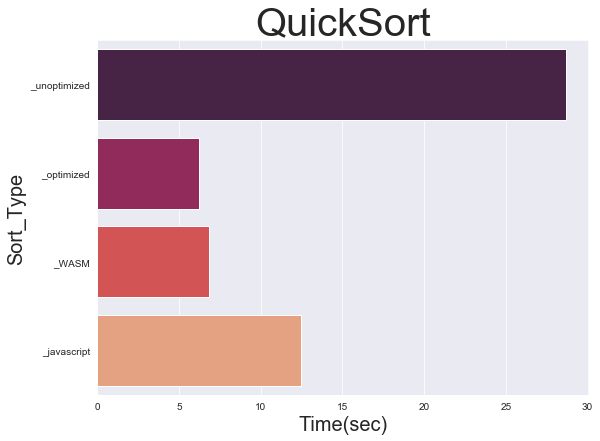

   _unoptimized  _optimized  _WASM  _javascript
0        28.682       6.236  6.873       12.458


In [19]:
quicksort_values=get_data("quicksort")
plot_graph("QuickSort",quicksort_values)

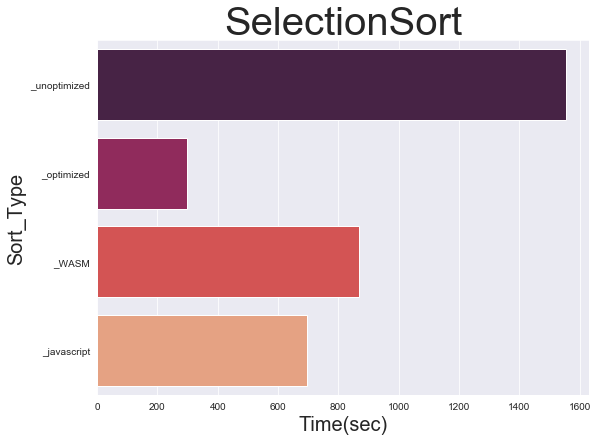

   _unoptimized  _optimized  _WASM  _javascript
0      1554.567     297.962  868.4       696.38


In [8]:
selectionsort_values=get_data("selectionsort")
plot_graph("SelectionSort",selectionsort_values)

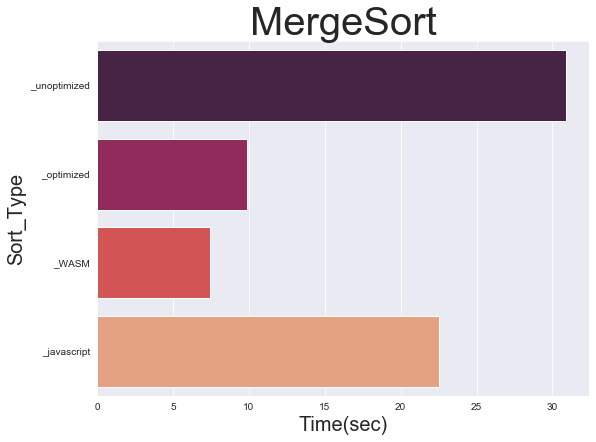

   _unoptimized  _optimized  _WASM  _javascript
0        30.889       9.908  7.462       22.515


In [7]:
mergesort_values=get_data("mergesort")
plot_graph("MergeSort",mergesort_values)

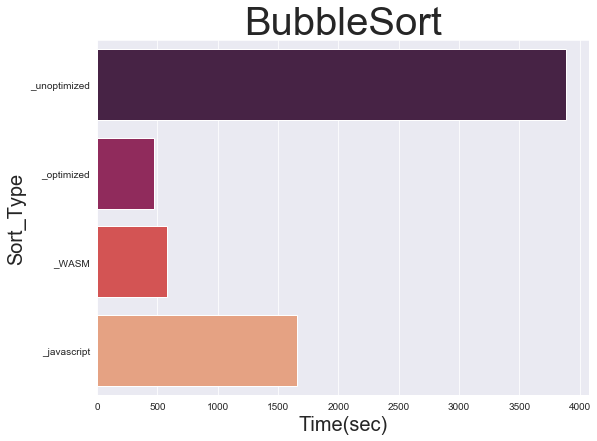

   _unoptimized  _optimized  _WASM  _javascript
0      3887.824     471.105  578.4      1655.98


In [10]:
bubblesort_values=get_data("bubblesort")
plot_graph("BubbleSort",bubblesort_values)

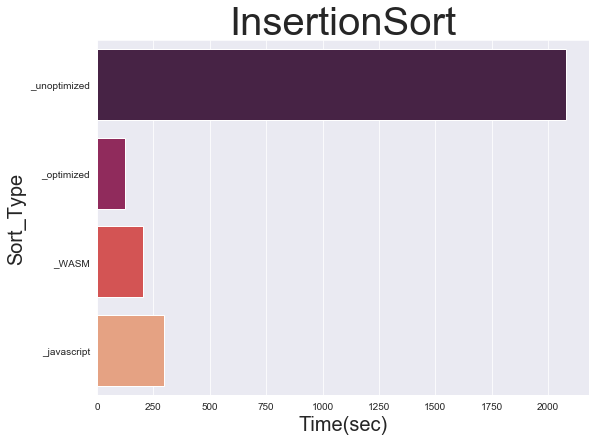

   _unoptimized  _optimized  _WASM  _javascript
0      2079.294     121.661  204.0       294.78


In [9]:
insertionsort_values=get_data("insertionsort")
plot_graph("InsertionSort",insertionsort_values)

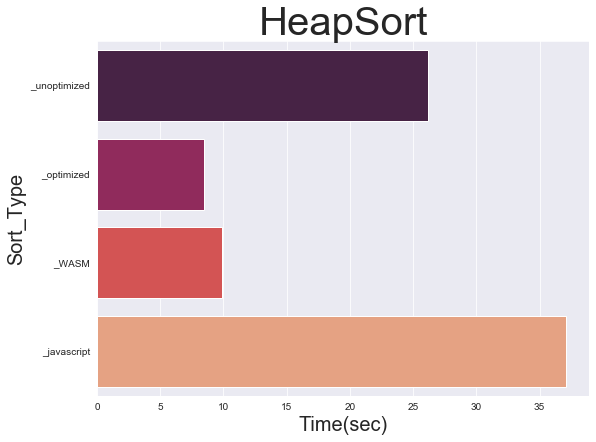

   _unoptimized  _optimized  _WASM  _javascript
0        26.153        8.48  9.907       37.093


In [14]:
heapsort_values=get_data("heapsort")
plot_graph("HeapSort",heapsort_values)